In [47]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.circuit.library import MCMT
from qiskit.visualization import *
from ibm_quantum_widgets import *

Oracle

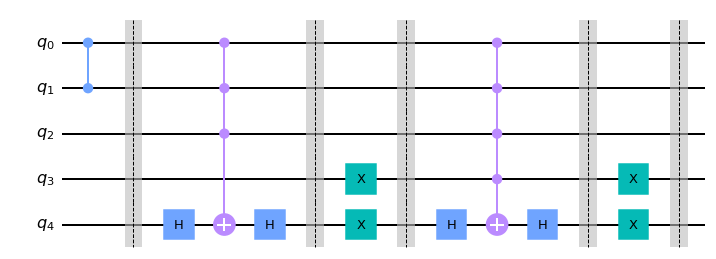

In [48]:
orc = QuantumCircuit(5)

orc.cz(0,1)
orc.barrier()

orc.h(4)
orc.mcx([0,1,2,], 4, mode='noancilla')
orc.h(4)
orc.barrier()

orc.x(3)
orc.x(4)
orc.barrier()
orc.h(4)
orc.mcx([0,1,2,3], 4, mode='noancilla')
orc.h(4)
orc.barrier()
orc.x(3)
orc.x(4)
orc.barrier()

orc.draw()

Reflector

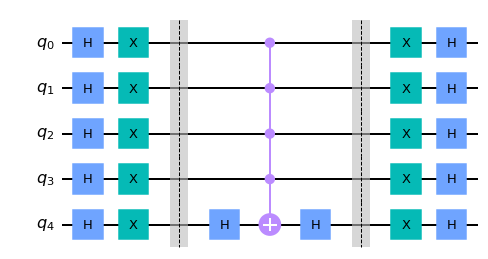

In [49]:
reflector = QuantumCircuit(5)

for i in range(5):
    reflector.h(i)
    reflector.x(i)

reflector.barrier()
reflector.h(4)
reflector.mct([0,1,2,3], 4)
reflector.h(4)
reflector.barrier()

for i in range(5):
    reflector.x(i)
    reflector.h(i)

reflector.draw()

Complete Circuit

/tmp/ipykernel_59/868268547.py:10: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  final = final + oracle
/tmp/ipykernel_59/868268547.py:11: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  final = final + reflect


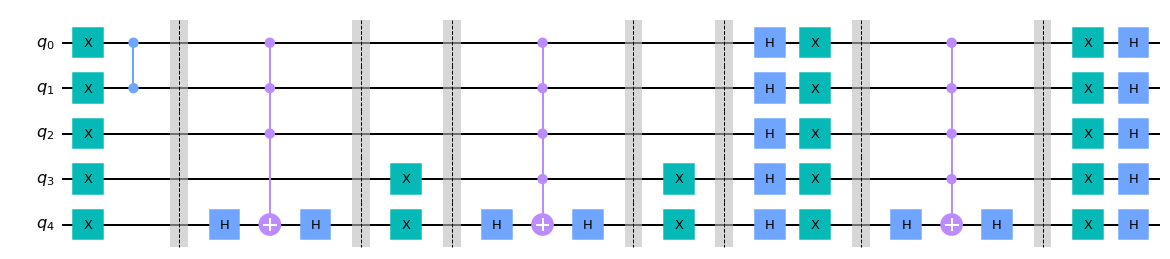

In [50]:
import math
k = math.floor((math.pi/4)*(math.sqrt(32)/math.sqrt(5)))

final = QuantumCircuit(5)

for i in range(5):
    final.x(i)

for i in range(k):
    final = final.compose(orc, qubits=[0,1,2,3,4])
    final = final.compose(reflector, qubits=[0,1,2,3,4])

final.draw()

Results

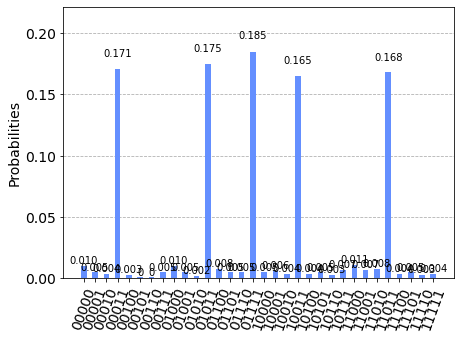

In [54]:
qasm = Aer.get_backend('qasm_simulator')
results = execute(final, qasm, shots=1024)
display(plot_histogram(result.circuit_results[0]))